In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import quandl
from datetime import datetime

In [2]:
ticker = 'GOOG'
try:
    # Reading data from pandas datareader
    df = pdr.get_data_yahoo(ticker, start = datetime(2004, 8, 19), end = datetime.today())

    # Writing the data into a CSV, in case API read fails
    df.to_csv('Datasets/' + ticker + '.csv')
except:
    df = pd.read_csv('Datasets/' + ticker + '.csv', index_col = 'Date', parse_dates = True)

In [3]:
# Earliest 5 rows
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-12,1147.339966,1138.780029,1143.989990,1144.900024,864000.0,1144.900024
2019-07-15,1150.819946,1139.400024,1146.859985,1150.339966,903800.0,1150.339966
2019-07-16,1158.579956,1145.000000,1146.000000,1153.579956,1238800.0,1153.579956
2019-07-17,1158.359985,1145.770020,1150.969971,1146.349976,1170000.0,1146.349976
2019-07-18,1147.604980,1132.729980,1141.739990,1146.329956,1290700.0,1146.329956


In [4]:
# Latest 5 rows
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3754.000000,3754.000000,3754.000000,3754.000000,3.754000e+03,3754.000000
mean,470.692199,461.998427,466.498794,466.442959,7.265364e+06,466.442959
std,318.495477,313.516233,316.016150,316.164387,8.137757e+06,316.164387
min,50.680038,47.800831,49.409801,49.818268,7.900000e+03,49.818268
25%,237.361557,232.330421,235.107506,234.863430,1.886850e+06,234.863430
50%,313.106400,308.090210,310.705399,310.869781,4.585200e+06,310.869781
75%,677.705017,662.190002,668.862503,671.762497,9.457300e+06,671.762497
max,1289.270020,1266.295044,1274.000000,1287.579956,8.254150e+07,1287.579956


In [6]:
# Sampling the data month-wise
mw = df.resample('M').mean().reset_index()
mw['Date'] = mw['Date'].apply(lambda date: f'{date.year}-{date.month}')
mw.set_index('Date', inplace = True)
mw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-8,53.797798,51.334253,52.502651,52.434573,1.491568e+07,52.434573
2004-9,57.245667,55.271401,55.779497,56.402162,1.016682e+07,56.402162
2004-10,77.978432,74.410615,75.960519,76.329374,2.457433e+07,76.329374
2004-11,90.639783,86.757195,88.750200,88.416214,2.653653e+07,88.416214
2004-12,91.655997,89.427305,90.359719,90.545612,1.326237e+07,90.545612


[]

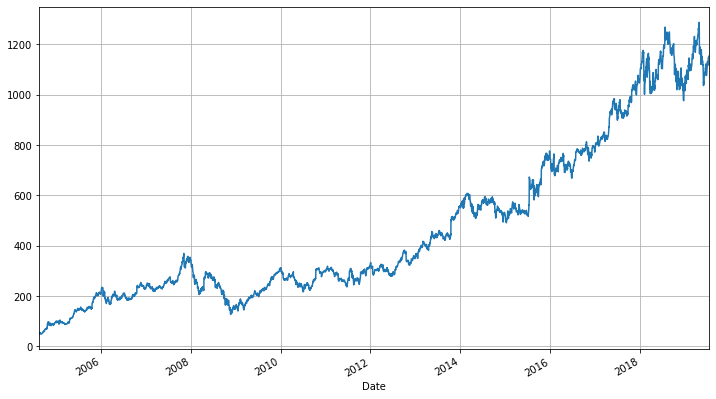

In [7]:
# Plotting closing prices
df['Close'].plot(grid = True, figsize = (12, 7))
plt.plot()

In [135]:
# Daily percentage change
daily_pct_change = df['Adj Close'].pct_change().fillna(0)
# Another method
# daily_pct_change = (df['Adj Close'] - df['Adj Close'].shift()) / df['Adj Close'].shift()

# Daily log returns
daily_log_returns = np.log(daily_pct_change)

/home/kartik/Documents/Python/SMA Crossover Project/smaenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/kartik/Documents/Python/SMA Crossover Project/smaenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [9]:
# Monthly percentage change
monthly = df.resample(rule = 'M').mean().pct_change()

In [10]:
# Quarter percentage change
quarterly = df.resample(rule = '4M').mean().pct_change()

[]

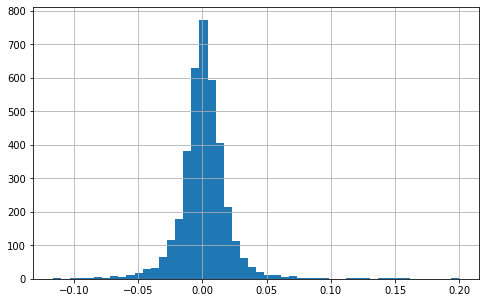

In [11]:
# Daily percentage change is normally distributed and most of the changes in the proximity of 0
daily_pct_change.hist(bins = 50, figsize = (8, 5))
plt.plot()

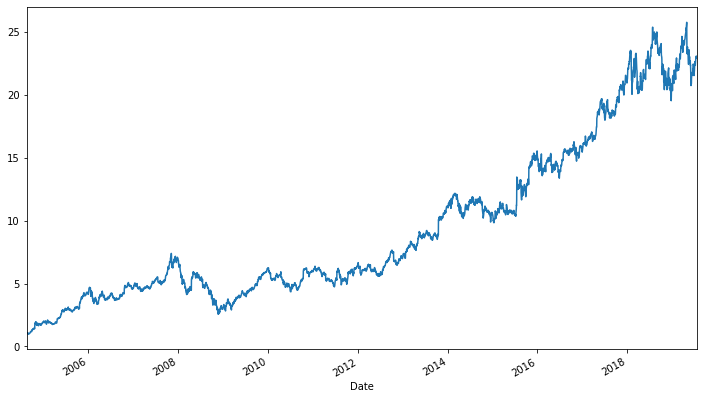

In [12]:
# Cumulative daily rate of return
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.plot(figsize = (12, 7))
plt.show()

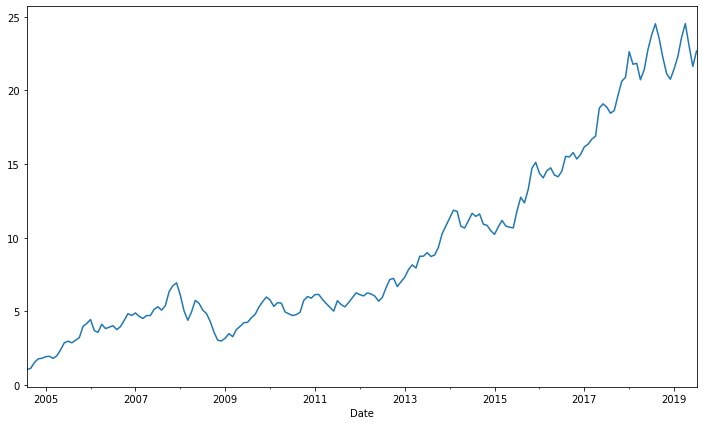

In [13]:
# Cumulative monthly returns
cum_monthly_returns = cum_daily_return.resample(rule = 'M').mean()
cum_monthly_returns.plot(figsize = (12, 7))
plt.show()

In [148]:
# Function to get multiple stock data
def get(tickers, start, end):
    def data(ticker):
        return pdr.get_data_yahoo(ticker, start = start, end = end)
    return pd.concat(map(data, tickers), keys = tickers, names = ['Ticker', 'Date'])

In [75]:
data_list = get(tickers = ['AAPL', 'GOOG', 'MSFT', 'IBM'], start = datetime(2010, 1, 1), end = datetime.today())
data_list.head()

High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2009-12-31  30.478571  30.080000  30.447144  30.104286   88102700.0   
       2010-01-04  30.642857  30.340000  30.490000  30.572857  123432400.0   
       2010-01-05  30.798571  30.464285  30.657143  30.625713  150476200.0   
       2010-01-06  30.747143  30.107143  30.625713  30.138571  138040000.0   
       2010-01-07  30.285715  29.864286  30.250000  30.082857  119282800.0   

                   Adj Close  
Ticker Date                   
AAPL   2009-12-31  26.372231  
       2010-01-04  26.782711  
       2010-01-05  26.829010  
       2010-01-06  26.402260  
       2010-01-07  26.353460

In [149]:
daily_adj_close = data_list['Adj Close'].reset_index().pivot(index = 'Date',
                                                             columns = 'Ticker',
                                                             values = 'Adj Close')
daily_adj_close.head()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2009-12-31,26.372231,308.832428,98.137283,24.152580
2010-01-04,26.782711,312.204773,99.299347,24.525019
2010-01-05,26.829010,310.829926,98.099792,24.532942
2010-01-06,26.402260,302.994293,97.462532,24.382378
2010-01-07,26.353460,295.940735,97.125160,24.128809


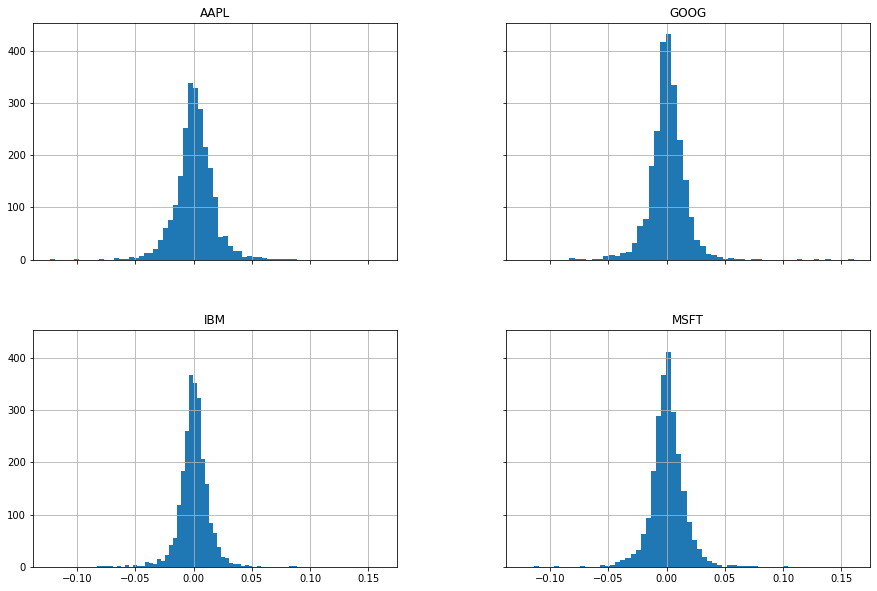

In [150]:
# Daily percentage change for each stock
daily_pct_change = daily_adj_close.pct_change()
daily_pct_change.hist(figsize = (15, 10), bins = 50, sharex = True, sharey = True)
plt.show()

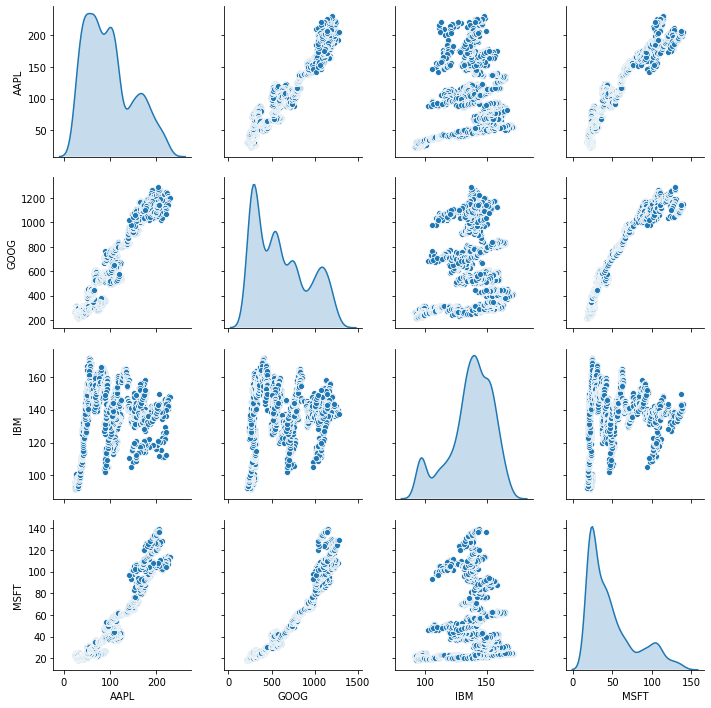

In [151]:
# Scatter plot of daily adj close for all stocks
sns.pairplot(daily_adj_close, diag_kind = 'kde')
# Another way
# pd.plotting.scatter_matrix(daily_adj_close, figsize = (15, 10), alpha = 0.1, diagonal = 'kde')
plt.show()

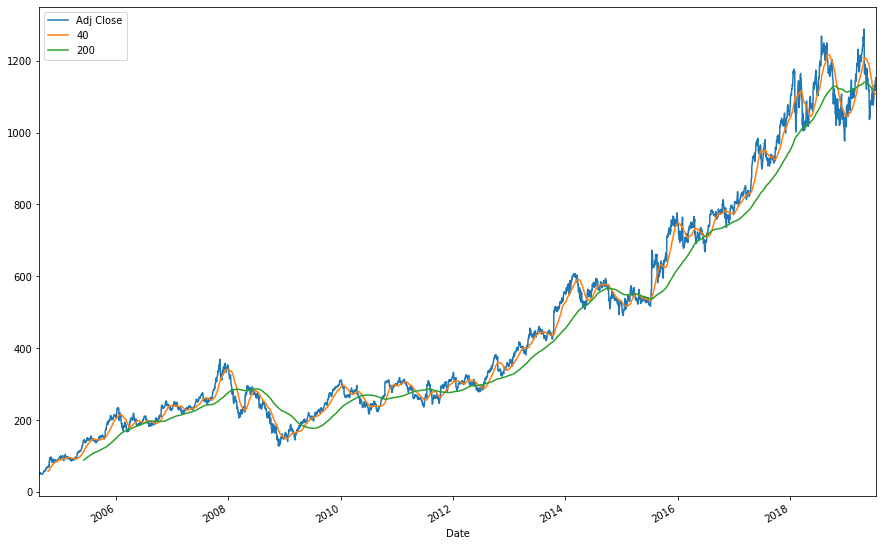

In [152]:
short_window = 40
long_window = 200

# Short and long moving windows rolling mean
df[f'{short_window}'] = df['Adj Close'].rolling(window = short_window).mean()
df[f'{long_window}'] = df['Adj Close'].rolling(window = long_window).mean()

# Plot adjusted close price, short and long windows rolling means
df[['Adj Close', f'{short_window}', f'{long_window}']].plot(figsize = (15, 10))
plt.show()

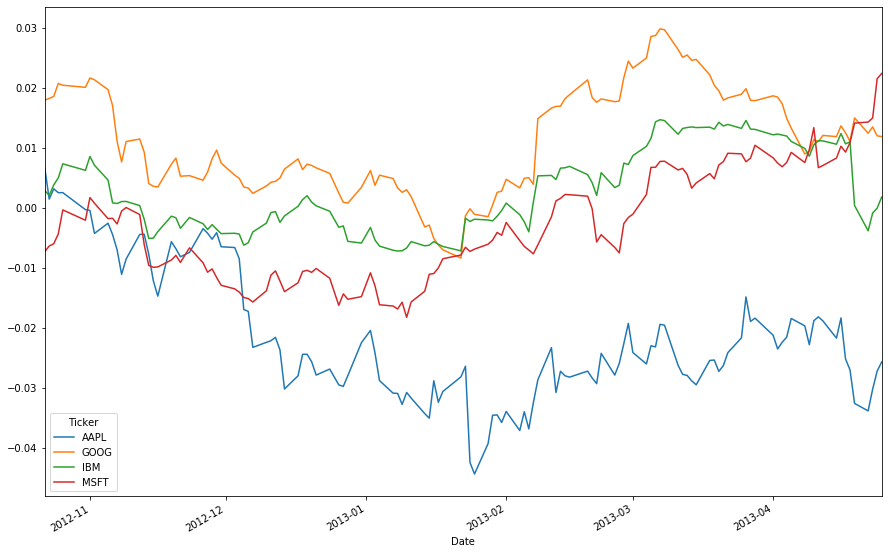

In [186]:
# Volatility of a stock
min_periods = 75
x = np.random.randint(1, daily_pct_change.shape[0] - 200)
vol = daily_pct_change[x:x+200].rolling(window = min_periods).mean().dropna(how = 'all') * np.sqrt(min_periods)
vol.plot(figsize = (15, 10))
plt.show()